In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
import csv
import os

# Utility Functions
**graph_from_data** allows quick graph generation if the paths to the node list and edge list are given. 

In [2]:
def graph_from_data(node_path, edge_path):
    # Extract network id from path
    network_id = os.path.basename(node_path)
    network_id = network_id.split('binary', 1)[0]
    network_id = network_id.split('graph', 1)[0]
    network_id = network_id[:-1]

    # Read node positions from the node file
    nodes = []
    with open(node_path) as csvfile:
        reader = csv.reader(csvfile, delimiter=' ', quoting=csv.QUOTE_NONNUMERIC)
        for row in reader:
            nodes.append({'node_id': int(row[0]), 'x': row[1], 'y': row[2]})

    # Read edge positions from the edge file
    edges = []
    with open(edge_path) as csvfile:
        reader = csv.reader(csvfile, delimiter=' ', quoting=csv.QUOTE_NONNUMERIC)
        for row in reader:
            edges.append({'node_id1': int(row[0]), 'node_id2': int(row[1]), 'radius': row[2], 'length': row[3]})

    # Create the graph with the networkx library
    G = nx.Graph()
    for node in nodes:
        G.add_node(node['node_id'], pos=(node['x'], node['y']))
    for edge in edges:
        G.add_edge(edge['node_id1'], edge['node_id2'], weight=edge['radius'], length=edge['length'])
        
    return network_id, G

**graph_generator** basically just applies **graph_from_data** to all file paths and returns the graphs one by one. Notice the word **yield** at the end instead of the usual **return** of python functions. This tells python that this function is a **generator**. We can iterate over this generator as if it were a list. Everytime we normally were to access the next list element, the generator yields the next result. This way, there is never more than one graph in the memory. If we created a list of all graphs, this list would probably be several GB in size.

In [3]:
def graph_generator():
    data_list = []
    for subset in ['BronxA', 'BronxB']:
        # Get a list of all files in the BronxA or BronxB directory
        file_list = sorted(os.listdir('data/networks-{}'.format(subset)))
        
        # The file names result in the node list always following the edge list,
        # which means that all even numbers correspond to edge lists and all odd
        # numbers to node lists.
        for i in range(len(file_list)//2):
            edge_path = os.path.join('data/networks-{}'.format(subset), file_list[2*i])
            node_path = os.path.join('data/networks-{}'.format(subset), file_list[2*i + 1])
            
            # Everytime the next element of the generator is accessed, the current step in
            # the loop is executed. After the 'yield' line is finished, the generator will pause
            # until the next element is accessed again. So everytime we access the next element,
            # we raise i to i+1, get the paths for the corresponding files and generate the graph
            # for these files.
            yield graph_from_data(node_path, edge_path)

# Features
It is a good idea to save our features in text files, so that we only have to calculate them once. Later on when we employ clustering, we can just read the values off of these files instead of iterating over the graphs again, which is time consuming.

## Geometrical

### Number of nodes and edges

In [ ]:
# Calculate the number of nodes and edges for each network and save them to files
with open('features/n_nodes.txt', 'w') as node_file, open('features/n_edges.txt', 'w') as edge_file:
    for network_id, graph in graph_generator():
        node_file.write(network_id + '  ' + str(nx.number_of_nodes(graph)) + '\n')
        edge_file.write(network_id + '  ' + str(nx.number_of_edges(graph)) + '\n')

### Average Node Degree

In [ ]:
# Calculate the average node degree, i.e. the average number of edges that are connected to a node,
# for each network and write them to a file
with open('features/average_node_degree.txt', 'w') as node_file:
    for network_id, graph in graph_generator():
        average_node_degree = np.mean(list(graph.degree().values()))
        node_file.write(network_id + '  ' + str(average_node_degree) + '\n')

## Topological

# Data Analysis

In [5]:
generator = graph_generator()

<IPython.core.display.Javascript object>


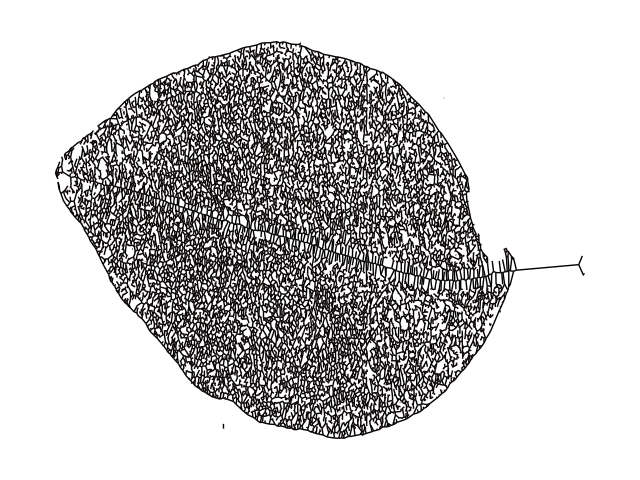

/Users/Ben/anaconda3/envs/leaf/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/Users/Ben/anaconda3/envs/leaf/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/Users/Ben/anaconda3/envs/leaf/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/Users/Ben/anaconda3/envs/leaf/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 

In [15]:
_, G = next(generator)
pos = nx.get_node_attributes(G,'pos')
nx.draw(G, pos=pos, node_size=0.0001)